![Logo](../../assets/logo.png)

Made by **Domonkos Nagy**

# Gambler's problem

A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends
when the gambler wins by reaching his goal of \\$100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite
MDP. The state is the gambler’s capital, $ s \in {1, 2, . . . , 99} $ and the actions
are stakes, $ a \in {0, 1, . . . , min(s, 100 - s)} $. The reward is zero on all transitions
except those on which the gambler reaches his goal, when it is +1.

Our goal is to find the optimal policy for this problem. We will implement a simple
algorithm that uses *value iteration* to solve the Bellman equation for the state-value
function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PROB_HEADS = 0.4 # probability that a coin comes up heads
THETA = 1e-12 # error treshold for the value iteration

In [3]:
v_estimations = np.zeros(101)
policy = np.zeros(101, dtype=int)
v_estimations[100] = 1

## Value iteration

Value iteration is similar to policy iteration, but the policy evaluation and policy improvement steps are combined: after
evaluation loop, the policy is updated to be greedy with respect to the current state-value function. At each iteration,
we update the value function according to the following formula:

$$ v_{k+1}(s) = \max_a \sum_{s', r}p(s', r | s, a) [r + \gamma v_k(s')] $$


# of sweeps: 22


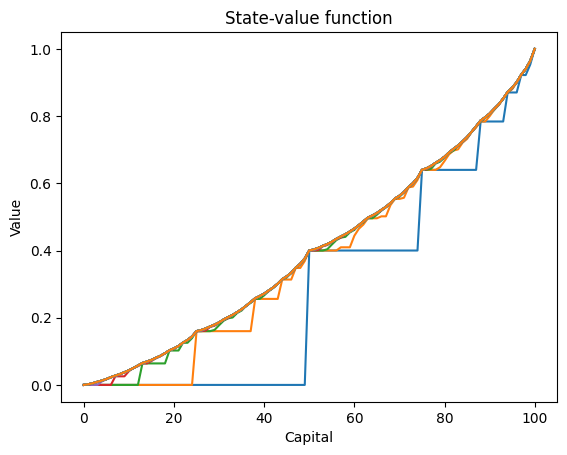

In [4]:
delta = THETA
i = 0

while delta >= THETA:
    delta = 0
    for s in range(1,100): # terminal states (0 and 100) are excluded from the loop
        v_old = v_estimations[s]

        best_action_value = 0
        best_action = 0

        for a in range(1, min(s, 100 - s) + 1):
            action_value = 0

            state_win = s + a
            state_lose = max(0, s - a)

            action_value += PROB_HEADS * v_estimations[state_win]
            action_value += (1 - PROB_HEADS) * v_estimations[state_lose]

            if action_value > best_action_value:
                best_action_value = action_value
                best_action = a
        
        v_estimations[s] = best_action_value
        policy[s] = best_action

        delta = max(delta, abs(v_old - best_action_value))
    plt.plot(np.arange(101), v_estimations)
    i += 1

plt.xlabel('Capital')
plt.ylabel('Value')
plt.title('State-value function')
plt.show()

print(f'# of sweeps: {i}')

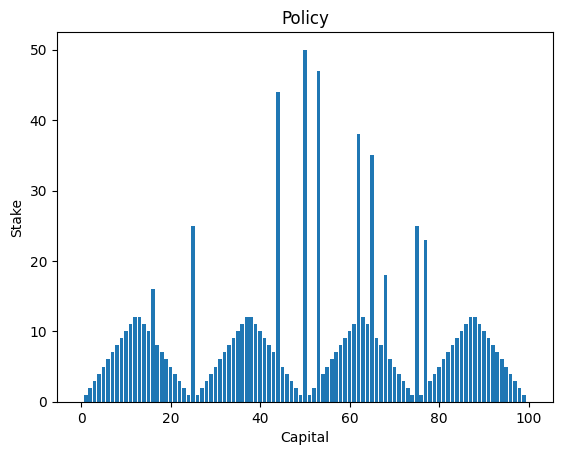

In [6]:
fig, ax = plt.subplots()
ax.bar(np.arange(101), policy)

plt.xlabel('Capital')
plt.ylabel('Stake')
plt.title('Policy')
plt.show()